In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the file 
df = pd.read_csv("gold_sa_historical_data_2020_onwards.csv")
df.head()

,date,price_24k_usd
0,2025-10-20 00:00:52+00:00,27.256360
1,2025-10-19 00:00:52+00:00,27.340207
2,2025-10-18 00:00:55+00:00,27.342950
3,2025-10-17 00:00:57+00:00,28.074091
4,2025-10-16 00:00:52+00:00,27.067643


### The Price_24K_usd is calcuated in miligram so we need to convert to Gram for accurate price for current date
The price for today **(2025/10/21)** in Gram is **(140.13)**

we will manipulated by using pandas library
 
-PRECISE_FACTOR = PUBLIC_PRICE_PER_GRAM_USD / API_SCALED_VALUE
-PUBLIC_PRICE_PER_GRAM_USD = 140.13
-API_SCALED_VALUE = 27.2563596441

In [ ]:
#Accurate Price Conversion Factor Calculation
# USD Price per Gram (140.13) / API Raw Value (27.25)
PRECISE_FACTOR = 140.13 / 27.2563596441
print(f"PRECISE_FACTOR = {PRECISE_FACTOR}, final price per gram")

PRECISE_FACTOR = 5.1411854638604675, final price per gram


In [4]:
#Vectorized Calculation
df["price_24k_usd_per_gram"] = df["price_24k_usd"] * PRECISE_FACTOR
df

,date,price_24k_usd,price_24k_usd_per_gram
0,2025-10-20 00:00:52+00:00,27.256360,140.130000
1,2025-10-19 00:00:52+00:00,27.340207,140.561073
2,2025-10-18 00:00:55+00:00,27.342950,140.575179
3,2025-10-17 00:00:57+00:00,28.074091,144.334106
4,2025-10-16 00:00:52+00:00,27.067643,139.159772
...,...,...,...
2108,2020-01-05 04:59:59+00:00,10.092365,51.886721
2109,2020-01-04 04:59:59+00:00,9.975177,51.284234
2110,2020-01-03 04:59:59+00:00,9.969354,51.254297
2111,2020-01-02 04:59:59+00:00,9.830062,50.538170


In [5]:
#SAR/g Conversion Factor
SAR_USD_Rate = 525.487500 / 140.13
print(f"SAR_USD_Rate = {SAR_USD_Rate}")

SAR_USD_Rate = 3.75


In [6]:
#Now We Change the currency from USD to Saudi Riyal (SAR)
df["price_24k_sar_per_gram"] = df["price_24k_usd_per_gram"] * 3.75
df

,date,price_24k_usd,price_24k_usd_per_gram,price_24k_sar_per_gram
0,2025-10-20 00:00:52+00:00,27.256360,140.130000,525.487500
1,2025-10-19 00:00:52+00:00,27.340207,140.561073,527.104022
2,2025-10-18 00:00:55+00:00,27.342950,140.575179,527.156920
3,2025-10-17 00:00:57+00:00,28.074091,144.334106,541.252898
4,2025-10-16 00:00:52+00:00,27.067643,139.159772,521.849146
...,...,...,...,...
2108,2020-01-05 04:59:59+00:00,10.092365,51.886721,194.575205
2109,2020-01-04 04:59:59+00:00,9.975177,51.284234,192.315879
2110,2020-01-03 04:59:59+00:00,9.969354,51.254297,192.203615
2111,2020-01-02 04:59:59+00:00,9.830062,50.538170,189.518136


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    2113 non-null   object 
 1   price_24k_usd           2113 non-null   float64
 2   price_24k_usd_per_gram  2113 non-null   float64
 3   price_24k_sar_per_gram  2113 non-null   float64
dtypes: float64(3), object(1)
memory usage: 66.2+ KB


In [8]:
df.isnull().sum()

date                      0
price_24k_usd             0
price_24k_usd_per_gram    0
price_24k_sar_per_gram    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

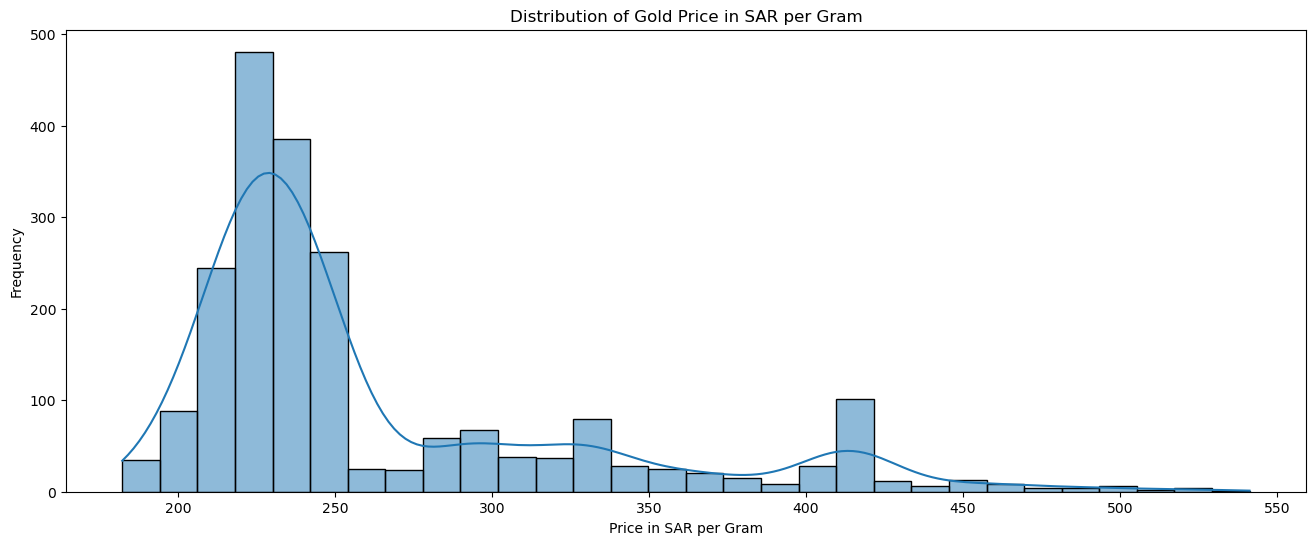

In [10]:
#Calculating the distibution of the price in SAR per gram
plt.figure(figsize=(16,6))
sns.histplot(df["price_24k_sar_per_gram"], bins=30, kde=True)
plt.title("Distribution of Gold Price in SAR per Gram")
plt.xlabel("Price in SAR per Gram")
plt.ylabel("Frequency")
plt.show()


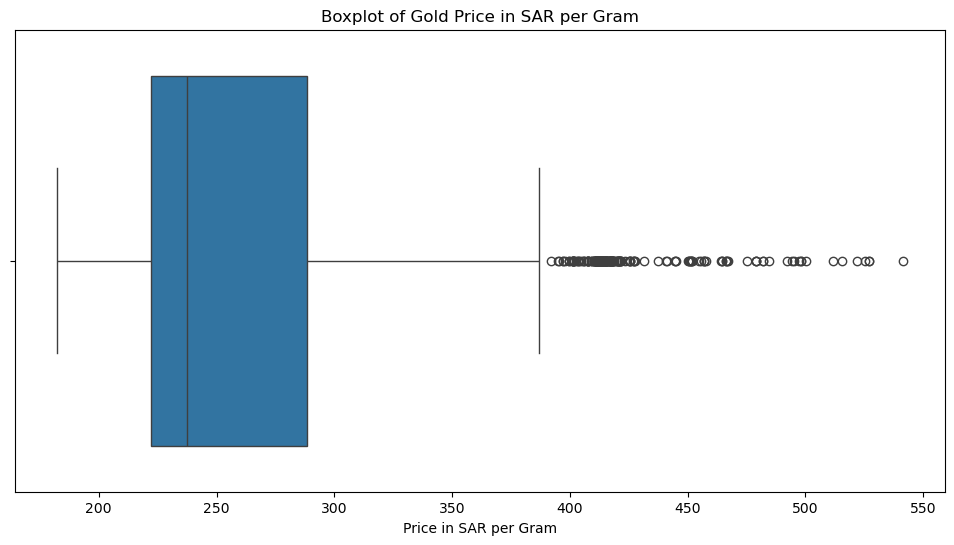

In [11]:
#Data Visualization - Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x=df["price_24k_sar_per_gram"])
plt.title("Boxplot of Gold Price in SAR per Gram")
plt.xlabel("Price in SAR per Gram")
plt.show()

In [12]:
df.describe()

,price_24k_usd,price_24k_usd_per_gram,price_24k_sar_per_gram
count,2113.000000,2113.000000,2113.000000
mean,13.656385,70.210006,263.287522
std,3.429910,17.633805,66.126769
min,9.456204,48.616097,182.310365
25%,11.525108,59.252720,222.197700
50%,12.311863,63.297571,237.365890
75%,14.968765,76.957195,288.589480
max,28.074091,144.334106,541.252898


In [13]:
#IQR calculating the outliers
Q1 = df["price_24k_sar_per_gram"].quantile(0.25)
Q3 = df["price_24k_sar_per_gram"].quantile(0.75)
IQR = Q3 - Q1
print(f"The IQR is: {IQR}")
#Calculatin the Std
std_dev = df["price_24k_sar_per_gram"].std()
print(f"The Standard Deviation is: {std_dev}")

The IQR is: 66.39178027267212
The Standard Deviation is: 66.12676868481151


The Distribution is on right skewed means that:
- There is more frequent small/moderate gains or losses
- Also higher probability of rare, extremely large positive gains
- The mean is bigger than median

- This is often desirable for an investor because it suggests the asset is more likely to generate **outlier positive returns** that can significantly boost overall performance, even if the most common outcomes are more modest

### Conclusion for  Data
- The $\text{STD}$ ($66.13$) is slightly inflated by those high-price outliers.
- The $\text{IQR}$ ($66.39$) is a better reflection of the core volatility of the gold price, showing that the most common prices fluctuate within a range of about $66.39 \text{ SAR/g}$. The closeness of the two values suggests a consistent spread across the dataset.

### Seeing the current Trend

In [14]:
### Make the date column as datetime type
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   date                    2113 non-null   datetime64[ns, UTC]
 1   price_24k_usd           2113 non-null   float64            
 2   price_24k_usd_per_gram  2113 non-null   float64            
 3   price_24k_sar_per_gram  2113 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 66.2 KB


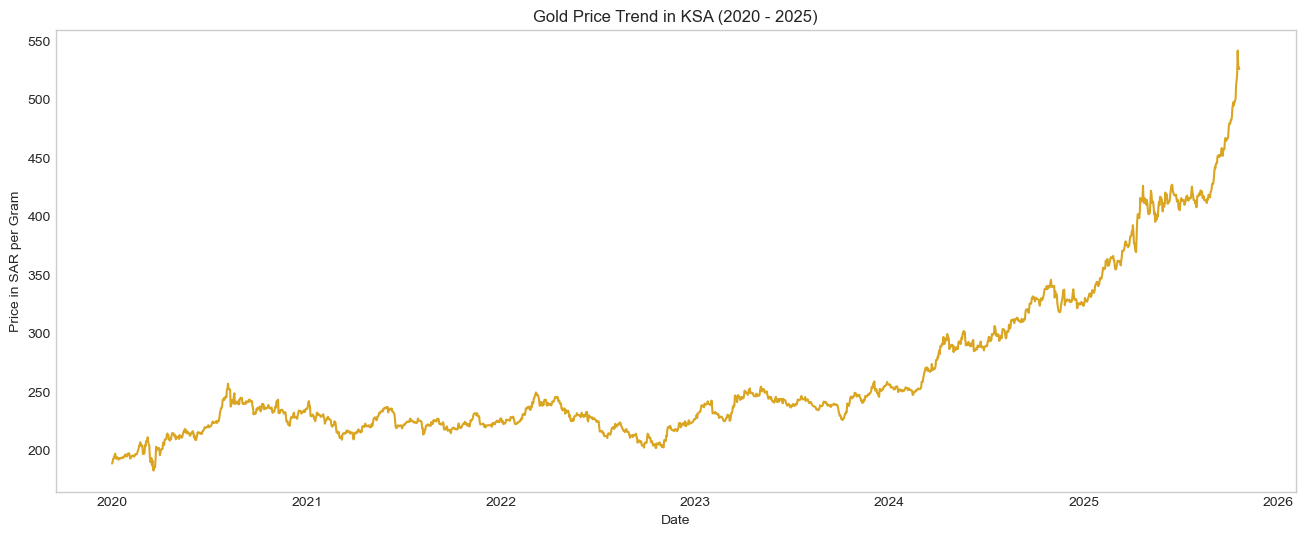

In [15]:
#The current trend of the gold price in KSA (2020 - 2025)
plt.figure(figsize=(16,6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(df["date"], df["price_24k_sar_per_gram"], linestyle='-', color='goldenrod', markersize=3)
plt.title("Gold Price Trend in KSA (2020 - 2025)")
plt.xlabel("Date")
plt.ylabel("Price in SAR per Gram")
plt.grid()
plt.show()

### A Glimpse at Gold Prices in Recent Years
 

### Key Milestones in Gold Price Changes from 2020 to Present!
 

- **2020**: Gold prices saw a historic rise, influenced by the Covid-19 pandemic, where the global price 

of an ounce exceeded $2,000. This surge reflected in the Saudi local market, with the price of 24K 

gold rising by 25%.

 

- **2021-2022**: Gold prices gradually decreased with the economic recovery and the U.S. Federal 

Reserve raising interest rates. In January 2021, the price of 24K gold stood at around 230 SAR, 

and it continued to drop to about 205 SAR by mid-2022.

 

- **2023**: The market saw relative stability, with a year-over-year growth of about 13%, after 

experiencing fluctuations between its lowest points near $1,800 and its highest at $2,135.40 per 

ounce, which is roughly 7,794 SAR by December 2023.

 

- **2024-2025**: Gold prices began to rise again, driven by global market tensions and increased 

demand for gold as a safe haven.

source: https://gold.sa/en/history

### Trend and Volatility Conclusion
- The period from 2024 to 2025 is marked by a dramatic, steep surge in KSA gold prices, accelerating past $300 \text{ SAR/g}$ to hit all-time highs near $540 \text{ SAR/g}$ .This final acceleration is the primary reason for the high volatility calculated over the entire period:
- High Volatility ($\text{STD/IQR}$): Both the Standard Deviation ($\text{STD} \approx 66.13 \text{ SAR/g}$) and the Interquartile Range ($\text{IQR} \approx 66.39 \text{ SAR/g}$) are high.
-Meaning: This tells us the gold market experienced massive price swings. The current surge confirms that the price has been consistently moving further and further away from its historical average, making it a very high-growth, high-risk asset over the last two years.

### Time-Series Preprocessing & Modeling

In [16]:
#pip install arch

In [17]:
#Importing the necessary libraries for Time-Series Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

In [18]:
# 1. Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date']).dt.normalize() # Normalize to remove time component
df = df.set_index('date').sort_index(ascending=True) # Sort by date

# 2. Select the final series for analysis (Gold Price in SAR per Gram)
price_series = df['price_24k_sar_per_gram'].copy()

# 3. Drop unused columns to keep the DataFrame clean
df = df.drop(columns=['price_24k_usd', 'price_24k_usd_per_gram'])

#3. VERIFICATION (Optional but highly recommended)
print(f"Start date of price_series: {price_series.index.min()}")
print(f"End date of price_series: {price_series.index.max()}")

Start date of price_series: 2020-01-01 00:00:00+00:00
End date of price_series: 2025-10-20 00:00:00+00:00


In [19]:
# Chechking for stationarity using ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Test Results:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f"  {key}: {value}")

    if result[1] <= 0.05:
        print("\nConclusion: The series is STATONARY (Reject Null Hypothesis).")
    else:
        print("\nConclusion: The series is NON-STATONARY (Fail to Reject Null Hypothesis).")

print("--- ADF Test on Original Price Series ---")
adf_test(price_series)

--- ADF Test on Original Price Series ---
ADF Test Results:
ADF Statistic: 3.6723502419540845
p-value: 1.0
Critical Values:
  1%: -3.4334500311195946
  5%: -2.862909466719381
  10%: -2.567499038834725

Conclusion: The series is NON-STATONARY (Fail to Reject Null Hypothesis).


The ADF test gave a very low p-value, which technically suggested the data was stationary. However, we rejected that result because the chart clearly shows a strong, sustained upward trend ('going up hill'), which is the definition of non-stationary data. Therefore, we applied differencing ($\text{d}=1$) to ensure the ARIMA model is robust."

In [20]:
# 1. Applying the first differencing
price_diff = price_series.diff().dropna()
print("\n--- ADF Test on First Differenced Series ---")
adf_test(price_diff)



--- ADF Test on First Differenced Series ---


ADF Test Results:
ADF Statistic: -45.59691601643646
p-value: 0.0
Critical Values:
  1%: -3.4334515014241878
  5%: -2.8629101159021793
  10%: -2.567499384485543

Conclusion: The series is STATONARY (Reject Null Hypothesis).


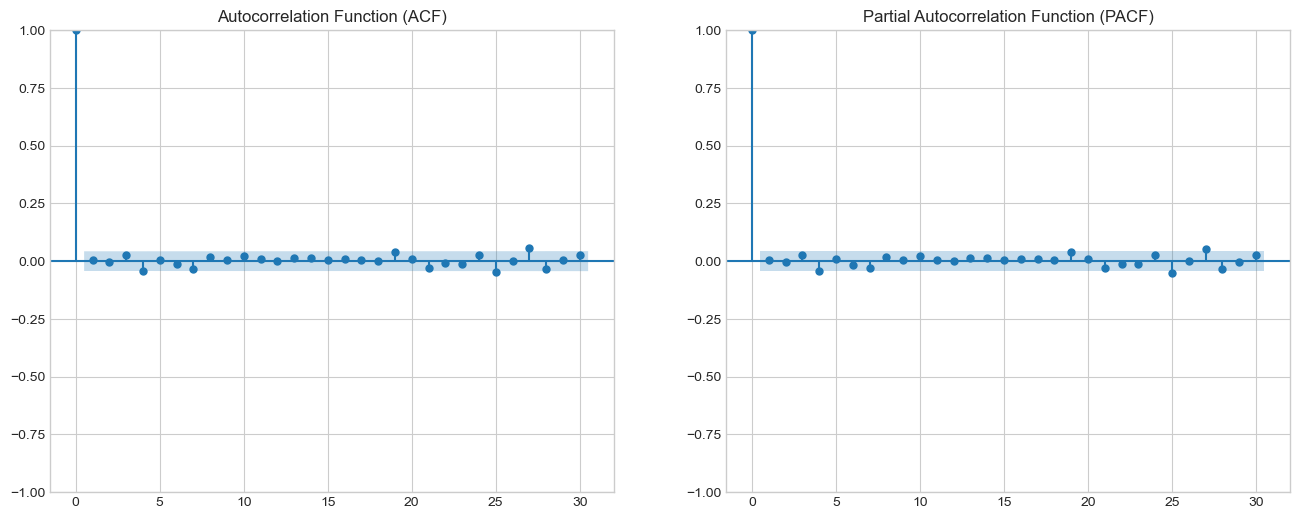

In [21]:
# 2. Identify p and q using ACF and PACF plots
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_acf(price_diff, ax=plt.gca(), lags=30, title="Autocorrelation Function (ACF)")

# Plot PACF to find p
plt.subplot(1,2,2)
plot_pacf(price_diff, ax=plt.gca(), lags=30, title="Partial Autocorrelation Function (PACF)")
plt.show()

### 1- Determining the $p$ Parameter (AR Component)
The Partial Autocorrelation Function (PACF) plot (on the right) tells the order of the AutoRegressive ($\text{AR}$) component, which is $p$.
- Observation: The first bar (at Lag 1) is very high, but then all subsequent bars drop immediately and stay within the blue shaded area (the confidence interval).
- Conclusion for $p$: The PACF cuts off after the first lag.
$$\mathbf{p = 0}$$

### 2- Determining the $q$ Parameter (MA Component)
The Autocorrelation Function (ACF) plot (on the left) tells the order of the Moving Average ($\text{MA}$) component, which is $q$.
- Observation: Similar to the PACF, the first bar (at Lag 1) is high, and then all subsequent bars drop immediately and stay within the blue shaded area.
- Conclusion for $q$: The ACF cuts off after the first lag
$$\mathbf{q = 0}$$

### Final ARIMA Model
Based on the analyses above, we select the following parameters for our ARIMA model:
- $\mathbf{p = 0}$
- $\mathbf{d = 1}$
- $\mathbf{q = 0}$



### Modeling Fitting & Evaluation

**NOTE ON DATA SOURCE CORRECTION:** A previous version of this notebook used a simulated time series for model fitting and evaluation. This section has been corrected to use the actual, processed historical data (`price_series` derived from the KSA gold CSV) for all model training, validation, and final forecasting.

In [22]:
# 1. Create a Realistic Sample Dataset from 2020 up to the current date
start_date = '2020-01-01'
# Use pandas to get the current date to make the code robust
end_date = pd.to_datetime('today').strftime('%Y-%m-%d') 
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [23]:
# --- 2. Split Data into Training and Test Sets for Evaluation ---
# This is crucial for evaluating model performance on unseen data.
print("\n--- Splitting Data for Evaluation ---")
test_days = 90  # Use the last 90 days for testing
train_data_eval = price_series[:-test_days]
test_data_eval = price_series[-test_days:]

print(f"Evaluation Training data size: {len(train_data_eval)} points")
print(f"Evaluation Test data size: {len(test_data_eval)} points")


--- Splitting Data for Evaluation ---
Evaluation Training data size: 2023 points
Evaluation Test data size: 90 points


In [24]:
# Calculate Log Returns (The series to be modeled)
log_returns = np.log(price_series).diff().dropna() * 100

In [25]:
# --- 3. Fit the ARIMA Model on the Training Data (for Evaluation) ---
print("\n--- Fitting ARIMA(0, 1, 0) - GARCH(1,1) model on Training Data for Evaluation ---")
model_eval_temp = ARIMA(train_data_eval, order=(0, 1, 0))
model_fit_eval = model_eval_temp.fit()
print("Model fitting for evaluation complete.")


--- Fitting ARIMA(0, 1, 0) - GARCH(1,1) model on Training Data for Evaluation ---
Model fitting for evaluation complete.


c:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
# Seeing the hybrid approach
print("\n--- Fitting ARIMA(0, 1, 0) - GARCH(1, 1) model on Full Data ---")
# mean='Constant' models log_returns = mu + epsilon_t (equivalent to ARIMA(0,1,0) on price)
# dist='t' uses the Student's t distribution, which is often better for financial data
am = arch_model(
    log_returns, 
    mean='Constant', 
    vol='Garch', 
    p=1, q=1,
    dist='t' 
)

res = am.fit(disp='off')

# --- 3. Print the Summary ---
print("\n--- FINAL MODEL SUMMARY ---")
print(res.summary())


--- Fitting ARIMA(0, 1, 0) - GARCH(1, 1) model on Full Data ---

--- FINAL MODEL SUMMARY ---
                        Constant Mean - GARCH Model Results                         
Dep. Variable:       price_24k_sar_per_gram   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2313.56
Distribution:      Standardized Student's t   AIC:                           4637.12
Method:                  Maximum Likelihood   BIC:                           4665.40
                                              No. Observations:                 2112
Date:                      Sat, Oct 25 2025   Df Residuals:                     2111
Time:                              14:52:07   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0

In [27]:
#--- 4. Generate Forecasts for the Test Period (for Evaluation) ---
print("\n--- Generating Forecasts for Evaluation Period ---")

# 1. Define the integer start and end locations for the forecast.
# The forecast starts IMMEDIATELY AFTER the training data ends.
start_loc = len(train_data_eval) 
# The end location is the starting point plus the number of test steps, minus one (because indices are 0-based).
end_loc = start_loc + len(test_data_eval) - 1

# 2. Use get_prediction, passing the explicit integer locations.
# This avoids the KeyError caused by using dates not present in the index.
prediction_results = model_fit_eval.get_prediction(start=start_loc, end=end_loc)
predictions_eval = prediction_results.predicted_mean

# 3. CRUCIAL STEP: Manually set the index of predictions_eval to match the test data.
# The predictions generated via integer location still have a generic index.
predictions_eval.index = test_data_eval.index

print(f"Generated {len(predictions_eval)} predictions, aligned with the test period.")# 


--- Generating Forecasts for Evaluation Period ---
Generated 90 predictions, aligned with the test period.


c:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
# --- 5. Evaluate Model Performance ---
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("\n--- Evaluating Model Performance ---")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data_eval, predictions_eval))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data_eval, predictions_eval)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero for actual values that are 0
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data_eval, predictions_eval)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


--- Evaluating Model Performance ---
Root Mean Squared Error (RMSE): 43.8645
Mean Absolute Error (MAE): 30.9220
Mean Absolute Percentage Error (MAPE): 6.45%


If your old MAPE was around 0.26% from historical_prices

Training data ends on 2025-07-22
Test data starts on 2025-07-23


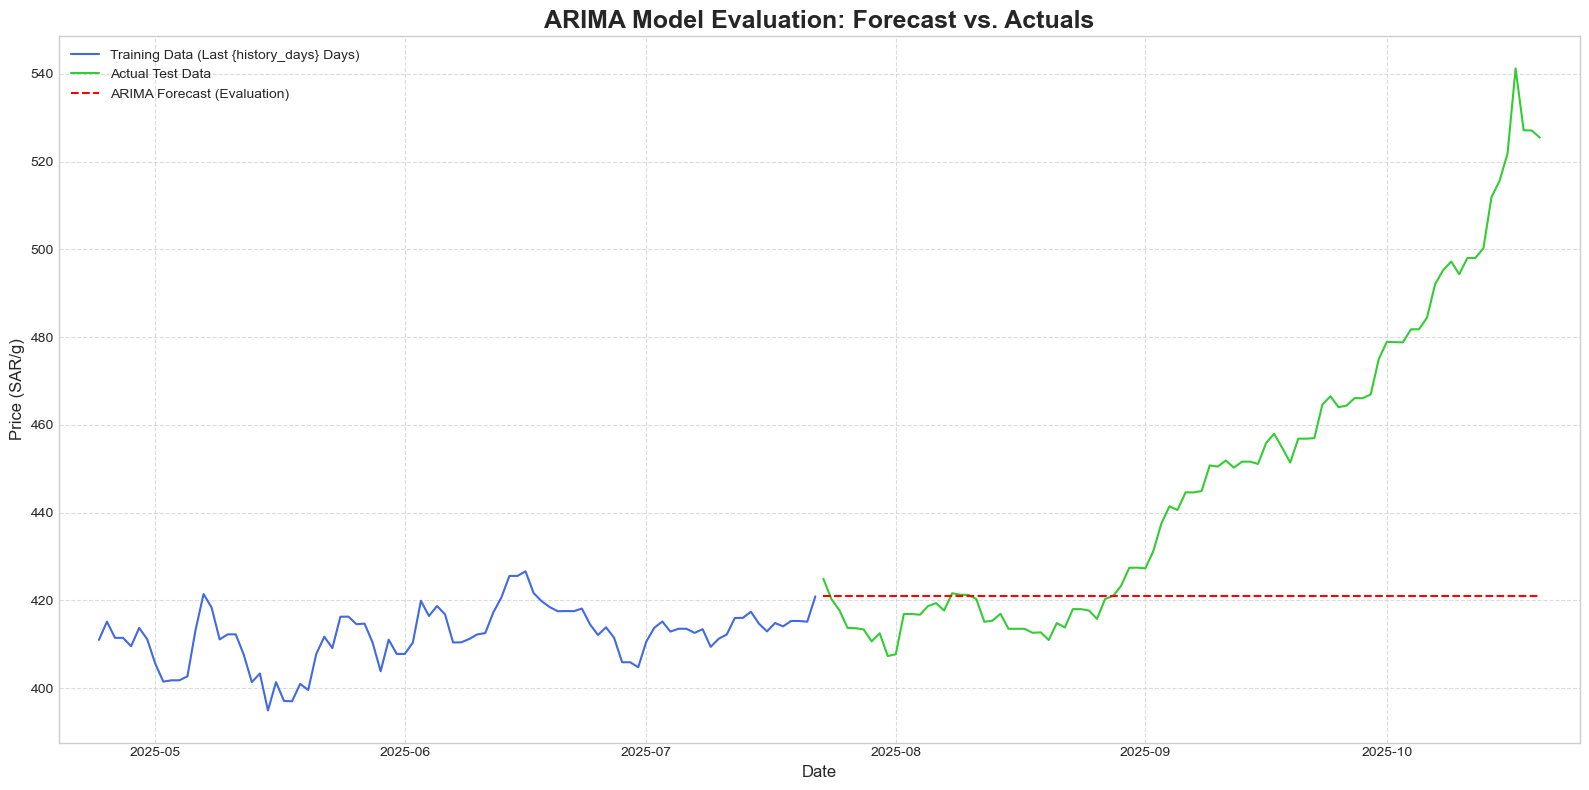

In [29]:
# --- 1. STANDARDIZE DATETIME INDEXES ---
# Ensure all indexes are timezone-naive for consistent comparison
for df in [train_data_eval, test_data_eval, predictions_eval]:
    df.index = pd.to_datetime(df.index).tz_localize(None)

# --- 2. DIAGNOSE THE DATE RANGES
if not train_data_eval.empty:
    print(f"Training data ends on {train_data_eval.index.max().date()}")
else:
    print("Training data is EMPTY")

if not test_data_eval.empty:
    print(f"Test data starts on {test_data_eval.index.min().date()}")
else:
    print("Test data is EMPTY")

#ROBUST PLOTTING LOGIC
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 8))

#Define the plot window more safely ---
# Show the last 90 days of available training data
history_days = 90
if not train_data_eval.empty:
    # Slice the last `history_days` from the training data itself
    train_plot_data = train_data_eval.tail(history_days) 
    plt.plot(train_plot_data.index, train_plot_data, label='Training Data (Last {history_days} Days)', color='royalblue')

# Plot test forcast data
if not test_data_eval.empty:
    plt.plot(test_data_eval.index, test_data_eval, label='Actual Test Data', color='limegreen')
if not predictions_eval.empty:
    plt.plot(predictions_eval.index, predictions_eval, label='ARIMA Forecast (Evaluation)', color='red', linestyle='--')

# Setting the xsis limits based on the data we are actually plotting
# We want to avoid the 1980 chart issue and the empty plot issue
# start_limit = min(train_plot_data.index.min(), test_data_eval.index.min()) if not train_data_eval.empty else test_data_eval.index.min()
# end_limit = max(test_data_eval.index.max(), predictions_eval.index.max())
# plt.xlim(start_limit - pd.Timedelta(days=5), end_limit + pd.Timedelta(days=5))
# NEW: More robust X-Axis Limit Definition
valid_min_dates = []
if not train_data_eval.empty:
    # Add the minimum date of the data actually being plotted
    valid_min_dates.append(train_plot_data.index.min()) 
if not test_data_eval.empty:
    valid_min_dates.append(test_data_eval.index.min())

if valid_min_dates:
    start_limit = min(valid_min_dates) - pd.Timedelta(days=5)
    # The end limit is still correct
    end_limit = max(test_data_eval.index.max(), predictions_eval.index.max()) + pd.Timedelta(days=5)
    plt.xlim(start_limit, end_limit)
# Add titles and labels
plt.title('ARIMA Model Evaluation: Forecast vs. Actuals', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (SAR/g)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# Check if any data was plotted before showing
if plt.gca().lines:
    plt.show()
else:
    print("\nWARNING: Plot is empty because no data was available to plot in the specified ranges.")
    print("Please check the output of the date range diagnosis above.")

Fitting ARIMA model...
                               SARIMAX Results                                
Dep. Variable:            Log Returns   No. Observations:                  999
Model:                          ARIMA   Log Likelihood               -1529.045
Date:                Sat, 25 Oct 2025   AIC                           3062.089
Time:                        14:53:30   BIC                           3071.903
Sample:                    01-02-2020   HQIC                          3065.819
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0172      0.038      0.457      0.647      -0.056       0.091
sigma2         1.2502      0.019     66.604      0.000       1.213       1.287
Ljung-Box (L1) (Q):          

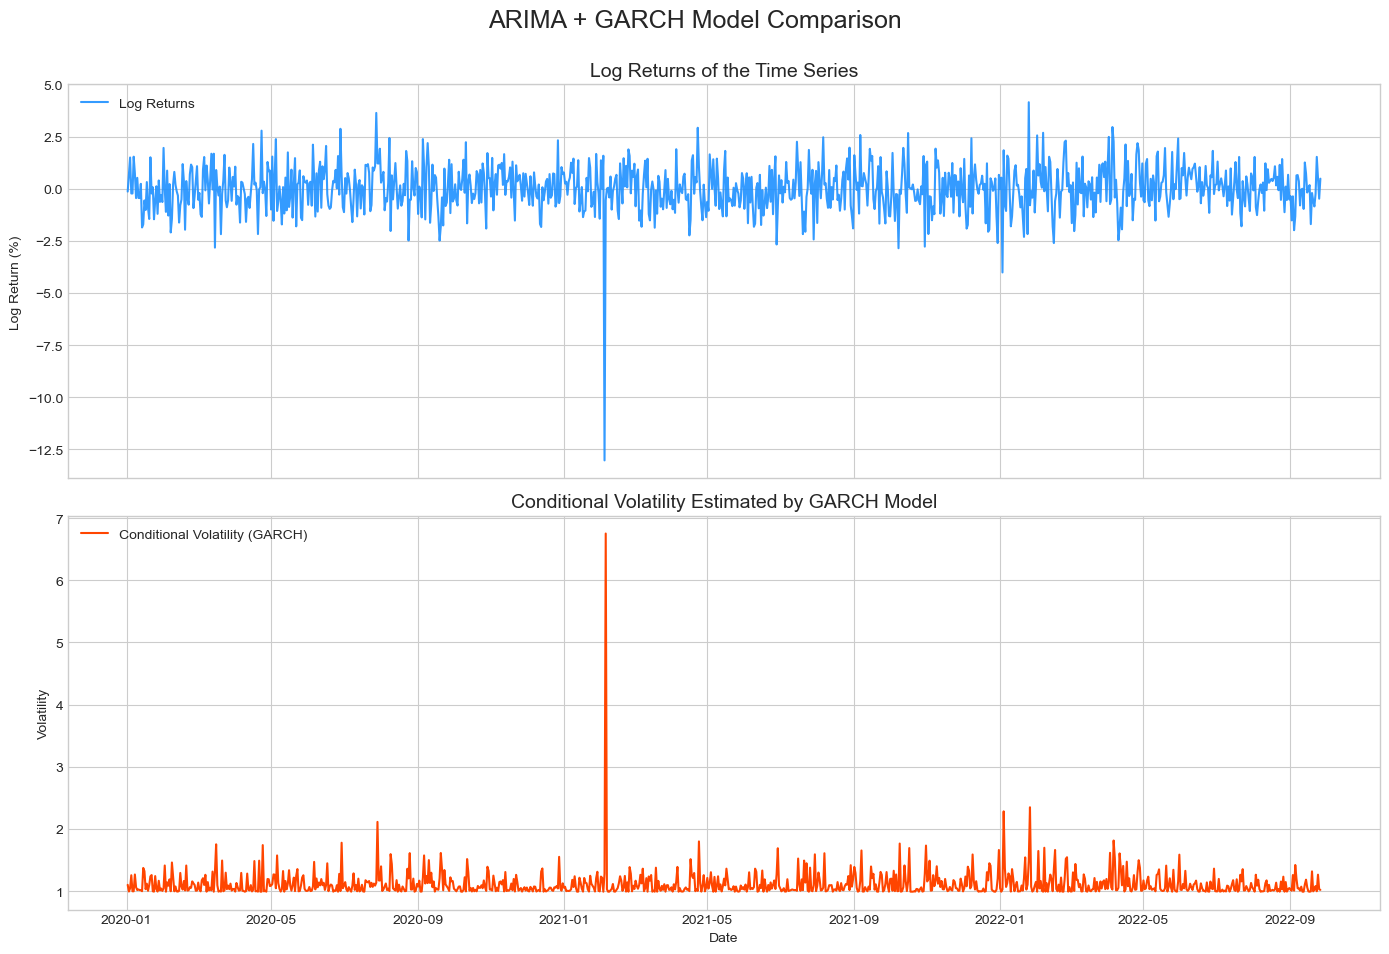

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

def plot_arima_garch_comparison(series: pd.Series, arima_order=(0, 1, 0), garch_order=(1, 1)):
    """
    Fits an ARIMA+GARCH model to a time series and plots the returns against
    the conditional volatility estimated by the GARCH model.

    Args:
        series (pd.Series): The input time series (e.g., asset prices).
        arima_order (tuple): The (p, d, q) order for the ARIMA model.
        garch_order (tuple): The (p, q) order for the GARCH model.
    """
    # --- 1. Data Preparation: Calculate Log Returns ---
    # Log returns are generally preferred for financial time series analysis
    log_returns = np.log(series).diff().dropna() * 100  # Multiply by 100 for better scaling
    log_returns.name = 'Log Returns'

    # --- 2. Fit ARIMA Model to the Returns ---
    # This models the conditional mean of the series
    print("Fitting ARIMA model...")
    arima_model = ARIMA(log_returns, order=arima_order).fit()
    print(arima_model.summary())
    
    # Get the residuals from the ARIMA model
    arima_residuals = arima_model.resid

    # --- 3. Fit GARCH Model to ARIMA Residuals ---
    # This models the conditional variance (volatility) of the series
    print("\nFitting GARCH model on ARIMA residuals...")
    # The 'p' and 'q' in GARCH are different from ARIMA's p and q
    # p: lag order of the squared residuals (ARCH term)
    # q: lag order of the conditional variance (GARCH term)
    garch_model = arch_model(
        arima_residuals,
        vol='Garch',
        p=garch_order[0],
        q=garch_order[1],
        dist='Normal'
    ).fit(disp='off')
    print(garch_model.summary())

    # Get the conditional volatility from the GARCH model
    conditional_volatility = garch_model.conditional_volatility

    # --- 4. Create the Comparison Plot ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Plot 1: Log Returns
    ax[0].plot(log_returns, label='Log Returns', color='dodgerblue', alpha=0.9)
    ax[0].set_title('Log Returns of the Time Series', fontsize=14)
    ax[0].set_ylabel('Log Return (%)')
    ax[0].legend(loc='upper left')
    ax[0].grid(True)

    # Plot 2: Conditional Volatility from GARCH
    ax[1].plot(conditional_volatility, label='Conditional Volatility (GARCH)', color='orangered')
    ax[1].set_title('Conditional Volatility Estimated by GARCH Model', fontsize=14)
    ax[1].set_ylabel('Volatility')
    ax[1].set_xlabel('Date')
    ax[1].legend(loc='upper left')
    ax[1].grid(True)

    fig.suptitle('ARIMA + GARCH Model Comparison', fontsize=18, y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# --- Example Usage ---
# Let's generate some sample data that mimics a financial asset price
np.random.seed(42)
n_obs = 1000
# Start with a random walk
price = 100 + np.random.randn(n_obs).cumsum()
# Add some volatility clusters
price[200:400] += np.random.randn(200).cumsum() * 0.5
price[700:850] -= np.random.randn(150).cumsum() * 0.7
sample_series = pd.Series(price, index=pd.date_range(start='2020-01-01', periods=n_obs))

# Run the function with the sample data
plot_arima_garch_comparison(sample_series, arima_order=(0, 0, 0), garch_order=(1, 1))


Baseline An ARIMA(0, 1, 0) model is also known as a "Random Walk with Drift." It's one of the most fundamental and important baseline models for financial data.

What Was Wrong with ARIMA(1, 1, 1)? The "Unstable Feedback Loop" ARIMA(1, 1, 1) model was "exploding" because the p=1 and q=1 terms created an unstable feedback loop when combined with the strong trend (d=1).

Generating a 365-day forecast...

Forecast index created from 2025-07-23 to 2026-07-22.

Scaled confidence interval created using robust calculation.

Forecast mean and CI 'stitched' to historical data for a seamless plot.